In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

#inbuilt libraries
from data_processing import preprocess_data

# Load the dataset
data = pd.read_csv('dementia_dataset.csv')

# Preprocess the data (excluding any non-feature columns like IDs or target variable)
X = preprocess_data(data.iloc[:, 3:])  # Assuming the first two columns are non-features
y = data.iloc[:, 2].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)  

# Get unique classes from y for target_names, converted to string
target_names = [str(label) for label in np.unique(y)]

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_names, labels=np.unique(y)))


              precision    recall  f1-score   support

   Converted       1.00      0.17      0.29        12
    Demented       0.91      1.00      0.95        39
 Nondemented       0.86      0.98      0.91        43

    accuracy                           0.88        94
   macro avg       0.92      0.71      0.72        94
weighted avg       0.90      0.88      0.85        94



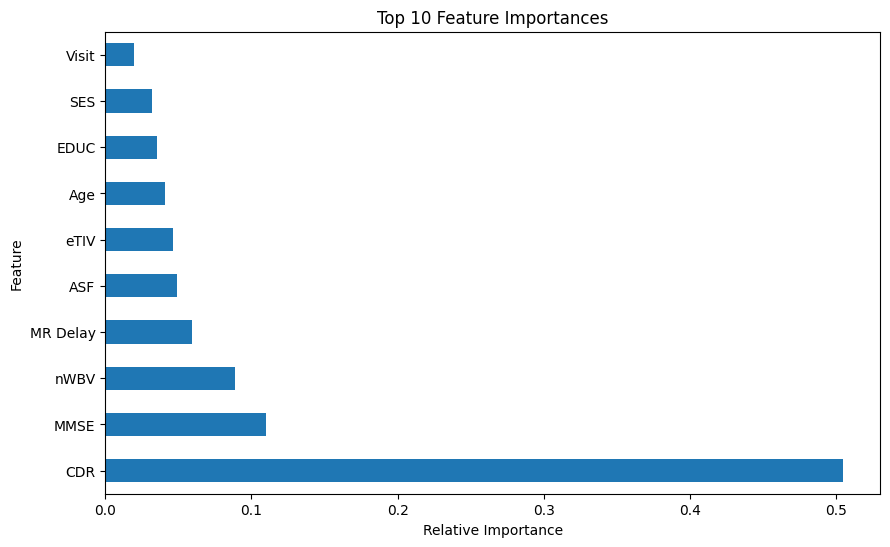

In [2]:
import matplotlib.pyplot as plt
rf = RandomForestClassifier(n_estimators=23, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


Average accuracy of individual trees: 0.791872340425532


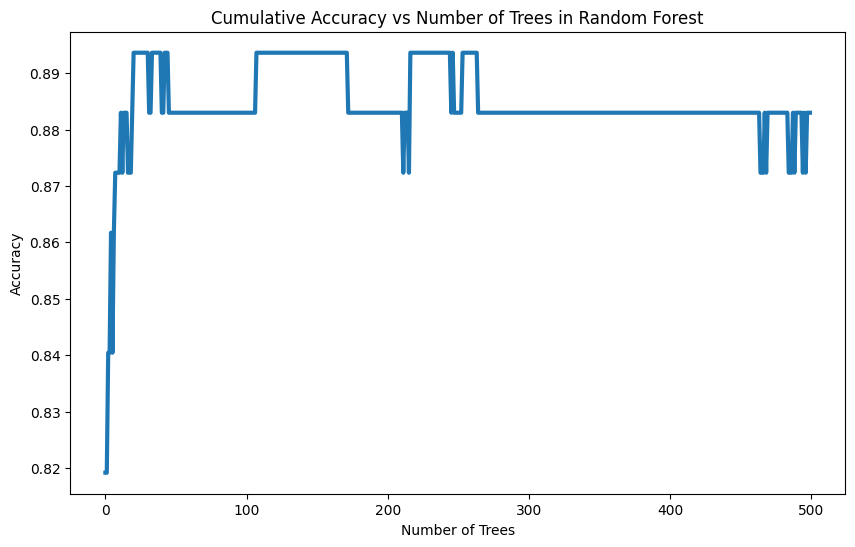

Best number of estimators: 21 with accuracy: 0.8936

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.93      1.00      0.96        39
           2       0.86      0.98      0.91        43

    accuracy                           0.89        94
   macro avg       0.93      0.74      0.76        94
weighted avg       0.91      0.89      0.87        94



In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)


# Encode y if it is not already integer-based
if not np.issubdtype(y_train.dtype, np.integer):
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

# Check individual accuracy of each tree to diagnose
single_tree_accuracies = []
for tree in rf.estimators_:
    tree_pred = tree.predict(X_test.values)
    single_tree_accuracies.append(accuracy_score(y_test, tree_pred))

print("Average accuracy of individual trees:", np.mean(single_tree_accuracies))

predictions = np.array([tree.predict_proba(X_test.values) for tree in rf.estimators_])
cum_mean = np.cumsum(predictions, axis=0) / np.arange(1, predictions.shape[0] + 1)[:, None, None]

# Compute accuracy with updated cumulative predictions
scores = []
for pred in cum_mean:
    pred_labels = np.argmax(pred, axis=1)  # Get the label with highest probability
    scores.append(accuracy_score(y_test, pred_labels))

plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Cumulative Accuracy vs Number of Trees in Random Forest')
plt.show()

best_n_estimators = np.argmax(scores) + 1
print(f"Best number of estimators: {best_n_estimators} with accuracy: {scores[best_n_estimators - 1]:.4f}")

# Get the cumulative predictions for the model with the highest accuracy
best_predictions = np.argmax(cum_mean[best_n_estimators - 1], axis=1)

# Display the classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_predictions))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

#inbuilt libraries
from data_processing import preprocess_data

# Load the dataset
data = pd.read_csv('dementia_dataset.csv')

# Preprocess the data (excluding any non-feature columns like IDs or target variable)
X = preprocess_data(data.iloc[:, 3:])  # Assuming the first two columns are non-features
y = data.iloc[:, 2].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=23, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)  

# Get unique classes from y for target_names, converted to string
target_names = [str(label) for label in np.unique(y)]

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_names, labels=np.unique(y)))



              precision    recall  f1-score   support

   Converted       1.00      0.25      0.40        12
    Demented       0.93      1.00      0.96        39
 Nondemented       0.86      0.98      0.91        43

    accuracy                           0.89        94
   macro avg       0.93      0.74      0.76        94
weighted avg       0.91      0.89      0.87        94



In [ ]:
from data_processing import select_chi_square_features
X=select_chi_square_features(X,y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=23, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)  

# Get unique classes from y for target_names, converted to string
target_names = [str(label) for label in np.unique(y)]

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_names, labels=np.unique(y)))

Selected Features Based on Chi-Square Test:
      Feature  Chi-Square Score
1   MR Delay       8730.156849
7        CDR        126.044030
6       MMSE         68.626076
8       eTIV         28.153708
2        M/F         14.399209
4       EDUC         14.324485
5        SES         12.711373
3        Age          4.695928
0      Visit          2.892589
9       nWBV          0.070393
10       ASF          0.012210
              precision    recall  f1-score   support

   Converted       1.00      0.25      0.40        12
    Demented       0.93      1.00      0.96        39
 Nondemented       0.86      0.98      0.91        43

    accuracy                           0.89        94
   macro avg       0.93      0.74      0.76        94
weighted avg       0.91      0.89      0.87        94



In [ ]:
from data_processing import k_fold_cross_validation
k_fold_cross_validation(rf,X,y)